# Практический проект по созданию рекомендательной системы.

# Цель
Построить рекомендательную систему по готовым данным

In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

## Датасет

Для построение рекомендательной системы будем использовать датасет `GroupLens Research` с сайта http://movielens.org. Он представляет собой набор ретинговых данных по фильмам.

Считаем данные из файлов.

In [9]:
# column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df_tags = pd.read_csv('data/tags.csv')
df_ratings = pd.read_csv('data/ratings.csv')
df_movies = pd.read_csv('data/movies.csv')
df_links = pd.read_csv('data/links.csv')

In [16]:
print('Таблица тегов фильмов')
df_tags.head(5)

Таблица тегов фильмов


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [17]:
print('Таблица рейтингов фильмов')
df_ratings.head(5)

Таблица рейтингов фильмов


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [18]:
print('Таблица названий фильмов')
df_movies.head(5)

Таблица названий фильмов


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
print('Таблица ID фильмов на сайтах movielens.org, imdb.com, themoviedb.org')
df_links.head(5)

Таблица ID фильмов на сайтах movielens.org, imdb.com, themoviedb.org


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


Соединим все таблицы в одну и сохраним результат в отдельный файл.

In [51]:
df_movies_links = pd.merge(df_movies, df_links, on='movieId')
del df_tags['userId']
df_ratings_tags = pd.merge(df_ratings, df_tags, on='movieId')
df = pd.merge(df_movies_links, df_ratings_tags, on='movieId')
df.to_csv('data/all_data.csv',index=False)

In [52]:
df = pd.read_csv('data/all_data.csv')
df.head(5)

,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp_x,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,847434962,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,847434962,pixar,1137206825


# EDA

In [53]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(12)

title
Woman Under the Influence, A (1974)                        5.00
Who Killed Chea Vichea? (2010)                             5.00
More (1998)                                                5.00
Come and See (Idi i smotri) (1985)                         5.00
Crossing Delancey (1988)                                   5.00
Into the Woods (1991)                                      5.00
Match Factory Girl, The (Tulitikkutehtaan tyttö) (1990)    5.00
Going Places (Valseuses, Les) (1974)                       5.00
Lady Jane (1986)                                           5.00
Two Family House (2000)                                    5.00
Awful Truth, The (1937)                                    4.75
Reefer Madness: The Movie Musical (2005)                   4.75
Name: rating, dtype: float64

In [55]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(12)

title
Pulp Fiction (1994)                                               55567
Fight Club (1999)                                                 11772
Star Wars: Episode IV - A New Hope (1977)                          6526
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)     4655
2001: A Space Odyssey (1968)                                       4469
Eternal Sunshine of the Spotless Mind (2004)                       4454
Inception (2010)                                                   3718
Big Lebowski, The (1998)                                           3392
Donnie Darko (2001)                                                3161
Forrest Gump (1994)                                                2961
Braveheart (1995)                                                  2370
Star Wars: Episode V - The Empire Strikes Back (1980)              2110
Name: rating, dtype: int64

In [56]:
ratings =pd.DataFrame(df.groupby('title')['rating'].mean())

In [57]:
ratings.head()

,rating
title,
(500) Days of Summer (2009),3.666667
...And Justice for All (1979),3.166667
10 Cloverfield Lane (2016),3.678571
10 Things I Hate About You (1999),3.527778
101 Dalmatians (1996),3.074468


In [58]:
ratings['rating_numbers'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,rating_numbers
title,,
(500) Days of Summer (2009),3.666667,336
...And Justice for All (1979),3.166667,3
10 Cloverfield Lane (2016),3.678571,28
10 Things I Hate About You (1999),3.527778,54
101 Dalmatians (1996),3.074468,94


In [59]:
ratings = ratings[ratings['rating_numbers'] < 336]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ce94110>,
      dtype=object)

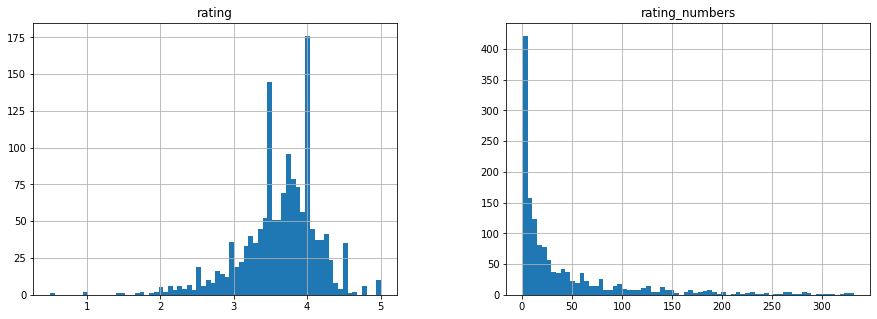

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
ratings.hist(bins=70,ax=axs)

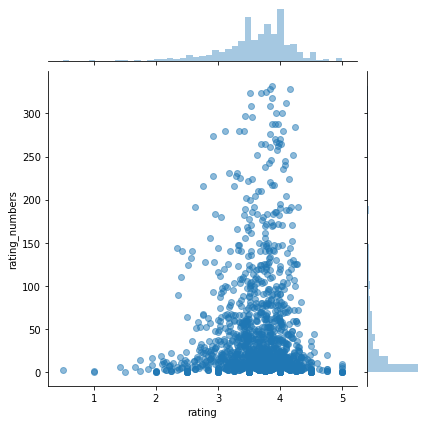

In [61]:
sns.jointplot(x='rating', y='rating_numbers', data=ratings, alpha=0.5)

In [63]:
moviemat = df.pivot_table(index='userId', columns='title', values='rating')
moviemat.head()

title,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),127 Hours (2010),13 Going on 30 (2004),...,Young Frankenstein (1974),Z (1969),Zack and Miri Make a Porno (2008),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zombieland (2009),Zoolander (2001),Zulu (1964),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
ratings.sort_values('rating_numbers', ascending=False).head(10)

,rating,rating_numbers
title,,
Almost Famous (2000),3.867470,332
In Bruges (2008),4.158537,328
Dances with Wolves (1990),3.835366,328
Juno (2007),3.769231,325
"Bourne Ultimatum, The (2007)",3.697531,324
Zoolander (2001),3.509259,324
Zombieland (2009),3.877358,318
Old Boy (2003),4.089744,312
Corpse Bride (2005),3.534091,308


In [66]:
starwars_user_ratings = moviemat['Almost Famous (2000)']
liar_liar_user_ratings = moviemat['Zoolander (2001)']

In [67]:
starwars_user_ratings.head()

userId
1    NaN
2    NaN
3    NaN
4    4.0
5    NaN
Name: Almost Famous (2000), dtype: float64

In [68]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_starwars.head()

/Users/Sergey/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/Sergey/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
(500) Days of Summer (2009)          0.440786
...And Justice for All (1979)             NaN
10 Cloverfield Lane (2016)           0.000000
10 Things I Hate About You (1999)    0.075754
101 Dalmatians (1996)                0.360316
dtype: float64

In [69]:
similar_to_liarliar = moviemat.corrwith(liar_liar_user_ratings)
similar_to_liarliar.head()

title
(500) Days of Summer (2009)          0.044273
...And Justice for All (1979)             NaN
10 Cloverfield Lane (2016)           0.790724
10 Things I Hate About You (1999)   -0.171146
101 Dalmatians (1996)                0.176054
dtype: float64

In [70]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [71]:
corr_starwars.head()

,Correlation
title,
(500) Days of Summer (2009),0.440786
10 Cloverfield Lane (2016),0.000000
10 Things I Hate About You (1999),0.075754
101 Dalmatians (1996),0.360316
101 Dalmatians (One Hundred and One Dalmatians) (1961),-0.123280


In [72]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Observe and Report (2009),1.0
Gross Anatomy (a.k.a. A Cut Above) (1989),1.0
Thor: Ragnarok (2017),1.0
Poltergeist III (1988),1.0
Devil's Playground (2002),1.0
Seven Brides for Seven Brothers (1954),1.0
Tokyo Godfathers (2003),1.0
Solo: A Star Wars Story (2018),1.0
Alice Doesn't Live Here Anymore (1974),1.0
